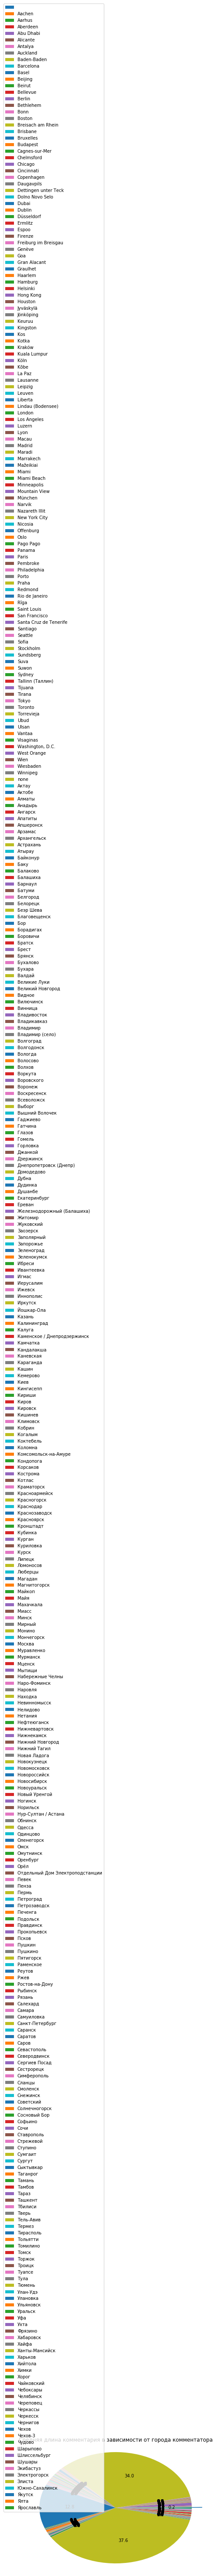

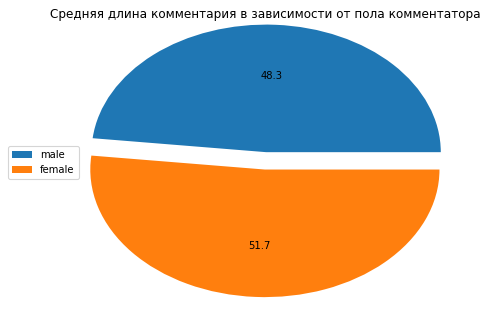

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import csv
import sqlite3

cities = []
genders = []
lens = []

conn = sqlite3.connect('database.db')
c = conn.cursor() 
for x in c.execute('SELECT * FROM comments ORDER BY city'):
    cities.append(x[6])
    genders.append(x[7])
    lens.append(x[5])

z = zip(cities, lens)
d_cities = {}
for x,y in z:
    if x in d_cities.keys():
        d_cities[x] = d_cities[x] + y
    else:    
        d_cities[x] = y
cities_gr = [x for x in d_cities.keys()]
lens_cities_gr = [x for x in d_cities.values()]

z = zip(genders, lens)
d_genders = {}
for x,y in z:
    if x in d_genders.keys():
        d_genders[x] = d_genders[x] + y
    else:    
        d_genders[x] = y
genders_gr = [x for x in d_genders.keys()]
lens_genders_gr = [x for x in d_genders.values()]
    
def graph(data_names,data_values,title):
    dpi = 80
    fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
    mpl.rcParams.update({'font.size': 9})

    plt.title(title)

    xs = range(len(data_names))

    plt.pie( 
        data_values, autopct='%.1f', radius = 1.1,
        explode = [0.15] + [0 for _ in range(len(data_names) - 1)] )
    plt.legend(
        bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
        loc = 'lower left', labels = data_names )
    fig.savefig('pie.png')


    plt.show()
    
title = 'Средняя длина комментария в зависимости от города комментатора'
data_names = cities_gr
data_values = lens_cities_gr
graph(data_names,data_values,title)

title = 'Средняя длина комментария в зависимости от пола комментатора'
data_names = genders_gr
data_values = lens_genders_gr
graph(data_names,data_values,title)

#первый график ужасно ненаглядный, но я не знаю, как можно переделать(
